# **Data Exploration - English-Vietnamese Translation Dataset**

In [1]:
import sys
from pathlib import Path

root_dir = str(Path.cwd().parent.absolute())
if not root_dir in sys.path:
    sys.path.insert(0, root_dir)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

from config import Config

sns.set_style('whitegrid')
config = Config.to_dict()

## **1. Load Data**

In [3]:
with open(f"{config["data_path"]}/raw/en.txt", 'r', encoding='utf-8') as f:
    english = f.readlines()

with open(f"{config["data_path"]}/raw/vi.txt", 'r', encoding='utf-8') as f:
    vietnamese = f.readlines()

In [4]:
df = pd.DataFrame({
    'english': [line.strip() for line in english],
    'vietnamese': [line.strip() for line in vietnamese]
})

In [5]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (146148, 2)


In [6]:
df.head(10)

,english,vietnamese
0,rachel pike the science behind a climate headline,rachel pike khoa_học đằng sau tiêu_đề khí_hậu
1,i'd like to talk to you today about the scale ...,hôm_nay tôi muốn nói_chuyện với bạn về quy_mô ...
2,headlines that look like this when they have t...,dòng tiêu_đề trông như thế_này khi liên_quan đ...
3,they are both two branches of the same field o...,cả hai đều là hai nhánh của cùng một lĩnh_vực ...
4,recently the headlines looked like this when t...,gần đây các tiêu_đề trông như thế_này khi ủy_b...
5,that report was written by 620 scientists from...,báo_cáo đó được viết bởi 620 nhà_khoa_học từ 4...
6,they wrote almost a thousand pages on the topic,họ đã viết gần một nghìn trang về chủ_đề này
7,and all of those pages were reviewed by anothe...,và tất_cả các trang đó đã được đánh_giá bởi hơ...
8,it's a big community,đó là một cộng_đồng lớn
9,it's such a big community in fact that our ann...,trên thực_tế đó là một cộng_đồng lớn đến mức c...


## **2. Basic Statistics**

In [7]:
# Sentence lengths
df['en_length'] = df['english'].apply(lambda x: len(x.split()))
df['vi_length'] = df['vietnamese'].apply(lambda x: len(x.split()))

print("English sentences:")
print(df['en_length'].describe())
print("\nVietnamese sentences:")
print(df['vi_length'].describe())

English sentences:
count    146148.000000
mean         14.567028
std           9.504673
min           1.000000
25%           7.000000
50%          12.000000
75%          20.000000
max          49.000000
Name: en_length, dtype: float64

Vietnamese sentences:
count    146148.000000
mean         15.507581
std           9.997411
min           1.000000
25%           8.000000
50%          13.000000
75%          21.000000
max          61.000000
Name: vi_length, dtype: float64


## **3. Length Distribution**

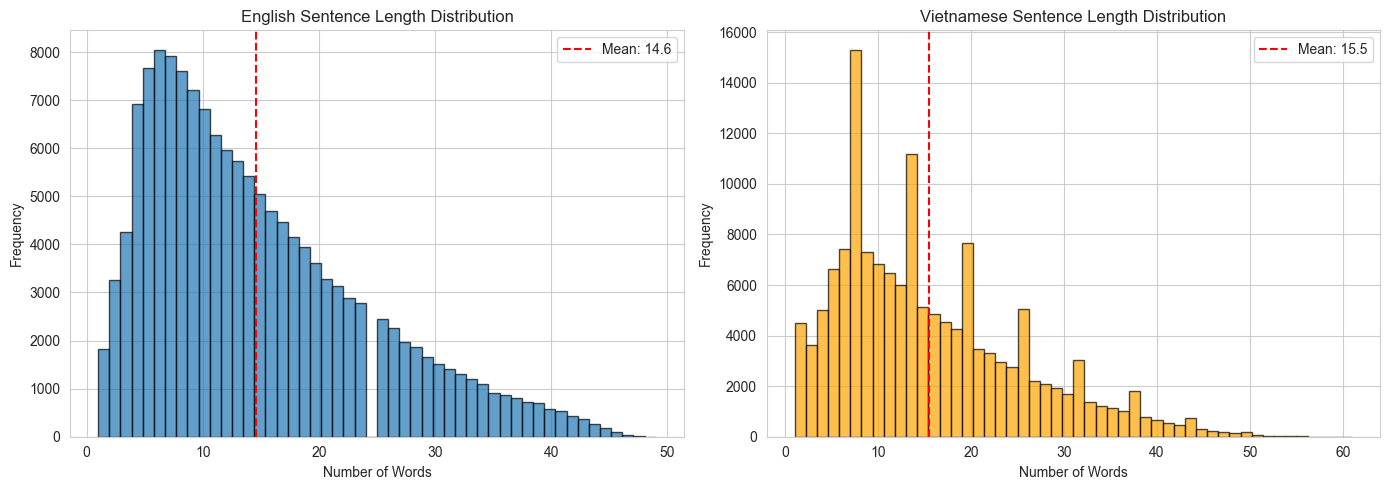

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# English
axes[0].hist(df['en_length'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('English Sentence Length Distribution')
axes[0].set_xlabel('Number of Words')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df['en_length'].mean(), color='red', linestyle='--',
                label=f'Mean: {df["en_length"].mean():.1f}')
axes[0].legend()

# Vietnamese
axes[1].hist(df['vi_length'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_title('Vietnamese Sentence Length Distribution')
axes[1].set_xlabel('Number of Words')
axes[1].set_ylabel('Frequency')
axes[1].axvline(df['vi_length'].mean(), color='red', linestyle='--',
                label=f'Mean: {df["vi_length"].mean():.1f}')
axes[1].legend()

plt.tight_layout()
plt.show()

## **4. Vocabulary Analysis**

In [9]:
def count_vocab(texts):
    word_freq = Counter()
    for text in texts:
        word_freq.update(text.lower().split())
    return word_freq

en_vocab = count_vocab(df['english'])
vi_vocab = count_vocab(df['vietnamese'])

print(f"English vocabulary size: {len(en_vocab):,}")
print(f"Vietnamese vocabulary size: {len(vi_vocab):,}")

print("\nTop 20 English words:")
print(en_vocab.most_common(20))

print("\nTop 20 Vietnamese words:")
print(vi_vocab.most_common(20))

English vocabulary size: 42,586
Vietnamese vocabulary size: 31,420

Top 20 English words:
[('the', 99776), ('and', 72063), ('to', 60007), ('of', 54676), ('a', 51203), ('that', 39334), ('in', 37759), ('i', 33828), ('is', 31704), ('you', 30795), ('we', 27361), ('it', 25536), ('this', 24217), ('so', 18432), ('was', 15077), ('for', 14881), ('are', 13614), ('have', 13248), ('they', 13124), ('but', 12881)]

Top 20 Vietnamese words:
[('và', 68701), ('là', 53707), ('tôi', 52760), ('một', 50113), ('của', 41833), ('bạn', 37804), ('đó', 34957), ('những', 32785), ('có', 30558), ('không', 28700), ('đã', 28307), ('trong', 25252), ('này', 23503), ('nó', 23164), ('người', 22870), ('các', 21497), ('chúng_tôi', 21306), ('chúng_ta', 20573), ('điều', 19933), ('được', 19510)]


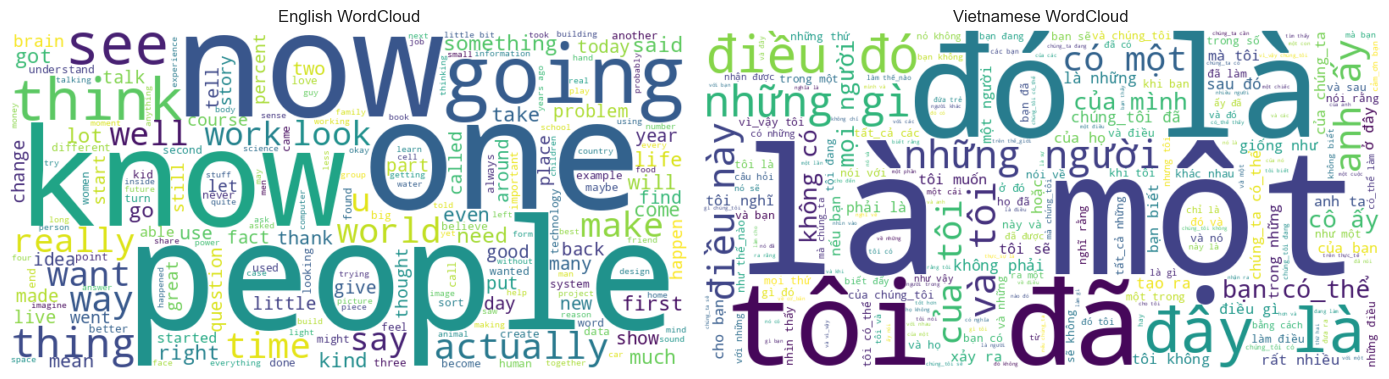

In [10]:
# Create WordCloud obect for English and Vietnamese
en_wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
).generate(" ".join(df["english"]))

vi_wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
).generate(" ".join(df["vietnamese"]))

# Display the generated image
_, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].imshow(
    en_wordcloud,
    interpolation='bilinear'
)
axes[0].axis("off")
axes[0].set_title('English WordCloud')

axes[1].imshow(
    vi_wordcloud,
    interpolation='bilinear'
)
axes[1].axis("off")
axes[1].set_title('Vietnamese WordCloud')

# Display all
plt.tight_layout()
plt.show()

## **5. Rare Words Analysis**

In [11]:
# Words appearing only once
en_rare = [w for w, c in en_vocab.items() if c == 1]
vi_rare = [w for w, c in vi_vocab.items() if c == 1]

print(f"English rare words (freq=1): {len(en_rare):,} ({len(en_rare)/len(en_vocab)*100:.1f}%)")
print(f"Vietnamese rare words (freq=1): {len(vi_rare):,} ({len(vi_rare)/len(vi_vocab)*100:.1f}%)")

English rare words (freq=1): 15,079 (35.4%)
Vietnamese rare words (freq=1): 14,682 (46.7%)


## **6. Length Filtering Impact**

In [12]:
# Test different max lengths
max_lengths = [20, 30, 40, 50, 60]

for max_len in max_lengths:
    filtered = df[(df['en_length'] <= max_len) & (df['vi_length'] <= max_len)]
    kept_pct = len(filtered) / len(df) * 100
    print(f"Max length {max_len}: {len(filtered):,}/{len(df):,} pairs ({kept_pct:.1f}%)")

Max length 20: 104,182/146,148 pairs (71.3%)
Max length 30: 130,817/146,148 pairs (89.5%)
Max length 40: 142,573/146,148 pairs (97.6%)
Max length 50: 145,945/146,148 pairs (99.9%)
Max length 60: 146,144/146,148 pairs (100.0%)


## **7. Sample Pairs**

In [13]:
print("Random sample pairs:\n")
for i in df.sample(5).index:
    print(f"EN: {df.loc[i, 'english']}")
    print(f"VI: {df.loc[i, 'vietnamese']}")
    print()

Random sample pairs:

EN: he said i know there are challenges ahead there may be trouble ahead but i fear no one
VI: anh ấy nói tôi biết có những thử_thách ở phía trước có_thể có những khó_khăn ở phía trước nhưng tôi không sợ ai cả

EN: one of my colleagues at the times did a great story about soldiers in iraq who could look down a street and detect somehow whether there was an ied a landmine in the street
VI: một trong những đồng_nghiệp của tôi tại times đã làm một câu_chuyện tuyệt_vời về những người lính ở iraq những người có_thể nhìn xuống một con phố và phát_hiện bằng cách nào đó liệu có ied một quả mìn trên đường_phố hay không

EN: and that's how i really began
VI: và đó là cách tôi thực_sự bắt_đầu

EN: it doesn't mean that people in authority can do whatever they want
VI: nó không có nghĩa là những người có thẩm_quyền có_thể làm bất_cứ điều gì họ muốn

EN: and what i mean by that is that anytime we've launched one of these technologies to the clinic we've made absolutely sure tha